In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import csv
import os

folder=input("Which is your input folder? ")
os.chdir("./"+folder)

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])

Which is your input folder? prova3ranks.0


In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_",
       "_total_lost_production_","_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_"]

In [5]:
# database
data={}
for name in names:
    data[name]=[]
    for k in range(rankNum):
        data[name].append(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

    data[name].append(data[name][0].copy()) #copy of first rank
    for k in range(1,rankNum):   #add others
        data[name][-1]=data[name][-1].add(data[name][k])

'_total_production_, all ranks'

,0,1,2
0,68.998710,220.272549,144.974393
1,122.758904,359.858690,145.006561
2,194.747703,409.705973,151.436696
3,248.894550,472.252556,160.783674
4,262.949263,504.159911,155.920660
...,...,...,...
95,390.718641,595.590794,43.047758
96,423.917389,640.378889,62.702394
97,388.088440,600.737096,85.040011
98,422.993513,638.043492,75.187945


'____________________________________________________________'

'_total_cost_of_production_, all ranks'

,0,1,2
0,136.5,394.8,244.65
1,235.5,625.2,237.30
2,351.0,698.4,247.80
3,465.0,818.4,262.50
4,529.5,892.8,256.20
...,...,...,...
95,712.5,1002.0,72.45
96,786.0,1070.4,99.75
97,745.5,1033.2,139.65
98,778.5,1081.2,122.85


'____________________________________________________________'

'_total_cost_of_unused_factors_, all ranks'

,0,1,2
0,1107.051532,1313.739957,526.054363
1,1008.051532,1083.339957,533.404363
2,892.551532,1010.139957,522.904363
3,778.551532,890.139957,508.204363
4,714.051532,815.739957,514.504363
...,...,...,...
95,531.051532,706.539957,698.254363
96,457.551532,638.139957,670.954363
97,498.051532,675.339957,631.054363
98,465.051532,627.339957,647.854363


'____________________________________________________________'

'_total_inventories_, all ranks'

,0,1,2
0,0.0,0.0,237.30
1,0.0,340.8,467.25
2,0.0,858.0,712.95
3,0.0,1477.2,975.45
4,217.5,2202.0,1224.30
...,...,...,...
95,51108.0,83247.6,10080.00
96,51751.5,84068.4,10175.55
97,51978.0,85142.4,10306.80
98,52668.0,85993.2,10425.45


'____________________________________________________________'

'_total_in_progress_inventories_, all ranks'

,0,1,2
0,121.5,360.0,0.0
1,339.0,591.6,0.0
2,676.5,706.8,0.0
3,1081.5,800.4,0.0
4,1242.0,867.6,0.0
...,...,...,...
95,2097.0,897.6,0.0
96,2172.0,1096.8,0.0
97,2485.5,940.8,0.0
98,2493.0,1124.4,0.0


'____________________________________________________________'

'_total_lost_production_, all ranks'

,0,1,2
0,8.007402,20.501212,5.841048
1,10.845778,31.414552,4.228622
2,9.256406,40.724820,1.538671
3,35.742504,63.884069,0.000000
4,85.264510,60.621319,4.414921
...,...,...,...
95,25.545706,14.366949,4.854984
96,37.746560,32.141572,2.792074
97,114.838806,69.708247,5.281518
98,44.094821,29.184057,2.463594


'____________________________________________________________'

'_total_cost_of_lost_production_, all ranks'

,0,1,2
0,15.0,34.8,7.35
1,18.0,52.8,7.35
2,13.5,66.0,2.10
3,60.0,105.6,0.00
4,151.5,100.8,7.35
...,...,...,...
95,43.5,24.0,7.35
96,67.5,50.4,4.20
97,205.5,115.2,8.40
98,81.0,46.8,4.20


'____________________________________________________________'

'_updatedLabor_, all ranks'

,0,1,2
0,650,1039,628
1,650,1039,628
2,650,1039,628
3,650,1039,628
4,650,1039,628
...,...,...,...
95,4755,3019,425
96,4755,3106,434
97,4755,3106,434
98,4755,3157,445


'____________________________________________________________'

'_updatedCapital_, all ranks'

,0,1,2
0,5894.296461,6648.903742,1417.133602
1,5853.363846,6602.730799,1407.292396
2,5812.715486,6556.878502,1397.519532
3,5772.349406,6511.344623,1387.814536
4,5732.263647,6466.126952,1378.176935
...,...,...,...
95,22023.127217,5998.519287,733.607443
96,21870.188834,6155.055507,728.782184
97,21718.312523,6112.312066,723.721197
98,21567.490908,6130.774795,719.943281


'____________________________________________________________'

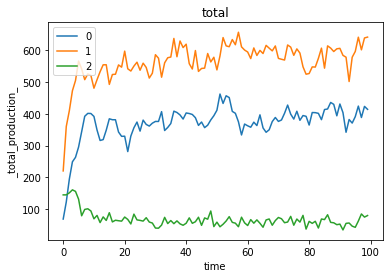

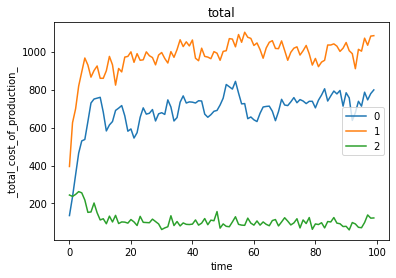

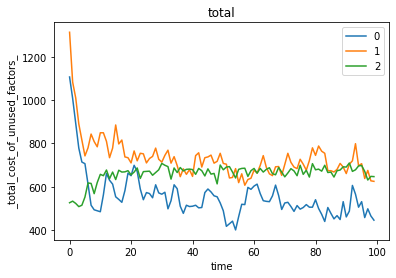

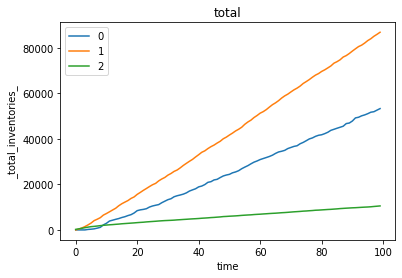

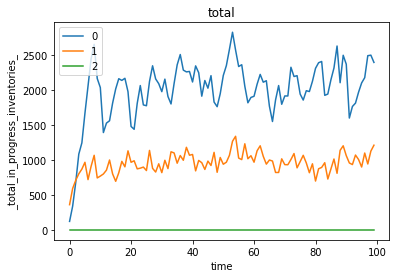

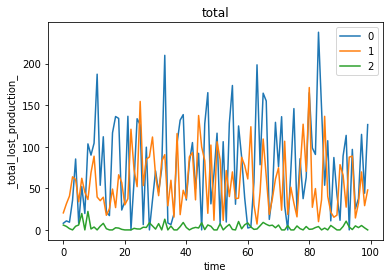

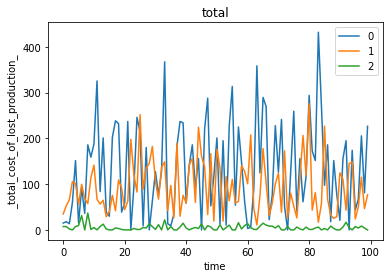

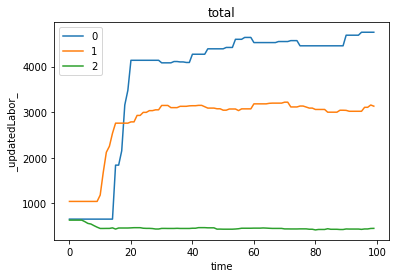

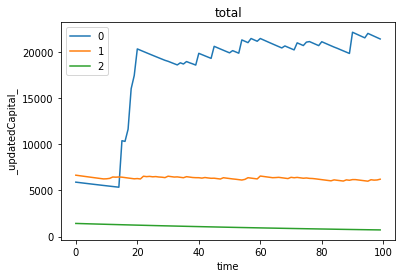

In [6]:
# totals
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a warning about open plots
    for name in names:
        display(name+", all ranks")
        display(data[name][-1])
        display("____________________________________________________________")
        data[name][-1].plot(title="total",xlabel="time",ylabel=name)